In [2]:
from graph_tool.all import *
import pickle
import matplotlib
import random

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import sys
import matplotlib.pyplot as plt
import random
import math
import collections
import csv
import timeit

def toc(start_time):
    elapsed = timeit.default_timer() - start_time
    print(elapsed)
start_time = timeit.default_timer()

#%matplotlib inline
%config InlineBackend.figure_format = 'svg'
plt.rcParams.update({'font.size': 8, 'font.style': 'normal', 'font.family':'serif'})
#matplotlib.rcParams.update({'font.size': 18})

from functions_reci_bursty import *
from statistics import *

from ADAM_model_power_law import *

from multiprocessing import Process
from joblib import Parallel, delayed


path_code='/mnt/sdb1/sandeep/1.Reciprocity/code/'
path_data='/mnt/sdb1/sandeep/1.Reciprocity/data/'
path_results='/mnt/sdb1/sandeep/1.Reciprocity/res/'

In [2]:
N=500      # number of nodes in the empirical network 
epsi=10**-3 # minimum allowed node activity
E=5000;
para1=1;para2=0;
Gamma=-4
g=Gamma+1

elist,num_edges=create_ADAM_power_law_elist(N,E,epsi,g,para1,para2)

Y=measures(pd.DataFrame(elist),'ADAM MODEL');
# Y=measures(elist,'ADAM MODEL');
#             del elist
#             temp_l_rec.append(Y.iloc[0,0])
#             temp_E_rec.append(Y.iloc[0,1])
#             temp_B_nodes.append(Y.iloc[0,2])
#             temp_B_edges.append(Y.iloc[0,3])


  edges n: 1393/1393

In [ ]:
# Y=measures(elist,'ADAM MODEL');


In [3]:
Y

,P(l_rec),P(E_rec),B_nodes,B_edges
Method,,,,
ADAM MODEL,0.773865,0.482164,-0.09171,-0.41126


In [1]:
# with open(path_data+'sms_ijt.pickle', 'rb') as handle:
#     sms_data = pickle.load(handle)

# df_edges_sms = pd.DataFrame(sms_data, columns = ['from', 'to', 't_second'])


# df_edges_college = pd.read_table(
#     path_data+'CollegeMsg.txt',header=None,sep=" ")
# df_edges_college.columns = ['from', 'to', 't_second']
# # print(df_edges_email)


# Y=measures(df_edges_college.drop_duplicates(),'ADAM MODEL');


In [3]:
ANTI_=0
def parallel_call_to_powerlaw_ADAM(arg):


    N=500      # number of nodes in the empirical network 
    epsi=10**-3 # minimum allowed node activity
    E=5000;

    l_rec_vs_Gamma=[];E_rec_vs_Gamma=[];B_nodes_vs_Gamma=[];B_edges_vs_Gamma=[];
    # storeE=np.linspace(500,5000,5)
    storeGamma=np.linspace(-4,-2,21)
    #[-2,-2.2,-2.4,-2.6,-2.8,-3,-3.2,-3.4,-3.6,-3.8,-4];

    num_trials=1;

    for Gamma in storeGamma:
        g=Gamma+1
        print('Gamma=',Gamma,)

        temp_l_rec=[];temp_E_rec=[];temp_B_nodes=[];temp_B_edges=[];
        for trials in range(num_trials):



            # number of edges in the empirical network
            # CALL TO ACVITY DRIVEN MODEL, RETURN TIME ORDERED EDGELIST
            para1=1;para2=0;
            if ANTI_==0:
                elist,num_edges=create_ADAM_power_law_elist(N,E,epsi,g,para1,para2)
            else:
                elist,num_edges=create_ADAM_power_law_elist_anticorrelated(N,E,epsi,g,para1,para2)
            

            Y=measures(pd.DataFrame(elist),'ADAM MODEL');
            del elist
            temp_l_rec.append(Y.iloc[0,0])
            temp_E_rec.append(Y.iloc[0,1])
            temp_B_nodes.append(Y.iloc[0,2])
            temp_B_edges.append(Y.iloc[0,3])
    #         print('\n')

        l_rec_vs_Gamma.append(mean(temp_l_rec))
        E_rec_vs_Gamma.append(mean(temp_E_rec))
        B_nodes_vs_Gamma.append(mean(temp_B_nodes))
        B_edges_vs_Gamma.append(mean(temp_B_edges))
#         print(end='\r')
    print('\n')
    return l_rec_vs_Gamma,E_rec_vs_Gamma,B_nodes_vs_Gamma,B_edges_vs_Gamma


# create_ADAM_power_law_elist_anticorrelated


In [4]:
# multiprocessing
# threading
actual_num_trials=5
arg_instances=list(np.arange(0,actual_num_trials,1))
results = Parallel(n_jobs=20,verbose=0,backend="threading")(
             map(delayed(parallel_call_to_powerlaw_ADAM), arg_instances))

Gamma=Gamma= -4.0
 -4.0
Gamma= Gamma= -4.0
Gamma=-4.0
-4.008
  edges n: 431/1438-3.90.99585441020.11320.13020.16040.2570.26560.31640.34840.35940.42180.42480.44660.47820.53420.53680.57220.59820.62120.64460.67760.72880.79720.82620.90780.92120.92240.96060.9902
  edges n: 162/1406 0.025-3.9988.99840.00380.99760.02220.0234
  edges n: 1202/1407-3.9a=0.0202.04040.0214
Gamma= -3.91203/14060.02340.0484
Gamma= -3.98406/14060.00340.0
  edges n: 70/1396-3.8a= 967499495660.12660.1180.14640.14280.24160.20.22420.32340.3550.34340.33740.40180.36020.41780.41440.42080.47120.4340.5540.52180.56860.61480.57680.62040.59840.6490.66880.66980.78080.76460.78020.78380.84660.85320.84880.84120.8870.89320.87220.89460.91160.94420.9840.95560.96180.9852
Gamma= -3.8175/14050.98282.01460.9796
Gamma= 0.9936-3.84050.99280.9918
  edges n: 1348/1395Gamma= -3.86.0336
Gamma= -3.81395/13950.0296
  edges n: 242/1405Gamma= -3.706972420.960.04280.16680.2480.20360.22980.26380.24540.29880.31520.32360.35320.32560.38460.4680.52080.579

/mnt/sdb1/sandeep/1.Reciprocity/codes/functions_reci_bursty.py:172: RuntimeWarning: invalid value encountered in double_scalars
  return((std-mean)/(std+mean))


  edges n: 238/119499638

  edges n: 248/11154

  edges n: 475/1115
  edges n: 479/1115
  edges n: 1115/1115



In [5]:
file_name = path_results+'results_ADAM_trials_'+str(ANTI_)+'_'+str(actual_num_trials)+'.pkl'
open_file = open(file_name, "wb")
pickle.dump(results, open_file)
open_file.close()

In [6]:
l_rec_vs_Gamma=[];
E_rec_vs_Gamma=[];
B_nodes_vs_Gamma=[];
B_edges_vs_Gamma=[]
cc=0
for xx in results:
    a,b,c,d=xx
    cc=cc+1
    print(cc)
    l_rec_vs_Gamma.append(a);
    E_rec_vs_Gamma.append(b)
    B_nodes_vs_Gamma.append(c)
    B_edges_vs_Gamma.append(d)
# a,b,c,d=try1
# l_rec_vs_Gamma,E_rec_vs_Gamma,B_nodes_vs_Gamma,B_edges_vs_Gamma
# l_rec_vs_Gamma,E_rec_vs_Gamma,B_nodes_vs_Gamma,B_edges_vs_Gamma=try2

# =
# l_rec_vs_Gamma

1
2
3
4
5


In [13]:
# B_edges_vs_Gamma
# E_rec_vs_Gamma
# B_nodes_vs_Gamma
# B_edges_vs_Gamma

In [7]:
mean_a=np.mean(np.array(B_edges_vs_Gamma),0)
mean_b=np.mean(np.array(E_rec_vs_Gamma),0)
mean_c=np.mean(np.array(B_nodes_vs_Gamma),0)
mean_d=np.mean(np.array(B_edges_vs_Gamma),0)
storeGamma=np.linspace(-4,-2,21)

with open(path_results+'results_ADAM_storeGamma_trialsE10000'+str(ANTI_)+'_'+str(actual_num_trials)+'.npy', 'wb') as f:
    np.save(f, mean_a)
    
with open(path_results+'results_ADAM_E_rec_vs_Gamma_trialsE10000'+str(ANTI_)+'_'+str(actual_num_trials)+'.npy', 'wb') as f:
    np.save(f, mean_b)
with open(path_results+'results_ADAM_B_nodes_vs_Gamma_trialsE10000'+str(ANTI_)+'_'+str(actual_num_trials)+'.npy', 'wb') as f:
    np.save(f, mean_c)
with open(path_results+'results_ADAM_B_edges_vs_Gamma_trialsE10000'+str(ANTI_)+'_'+str(actual_num_trials)+'.npy', 'wb') as f:
    np.save(f, mean_d)
with open(path_results+'results_ADAM_storeGamma_trialsE10000'+str(ANTI_)+'_'+str(actual_num_trials)+'.npy', 'wb') as f:
    np.save(f, storeGamma)    


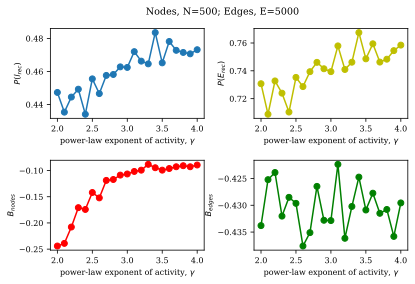

In [8]:
#PLOTTING behaviour as a function of number of Gamma
storeGamma=np.linspace(-4,-2,21)

x=storeGamma;
x =  [abs(ele) for ele in x]


fig, axs = plt.subplots(2, 2)
fig.tight_layout(pad=3.0)

y=mean_a;
axs[0, 0].plot(x, y,'o-')
# plt.xlabel('number of edges, E');plt.ylabel('$P(l_{rec})$');

# axs[0, 0].set_title('Axis [0, 0]')

y=mean_b;
axs[0, 1].plot(x, y,'yo-')
# axs[0, 1].set_title('Axis [0, 1]')

y=mean_c;
axs[1, 0].plot(x, y,'ro-')
# axs[1, 0].set_title('Axis [1, 0]')

y=mean_d;
axs[1, 1].plot(x, y,'go-')
# axs[1, 1].set_title('Axis [1, 1]')

i=0;labels_=['P(l_{rec})','P(E_{rec})','B_{nodes}','B_{edges}'];
fig.suptitle('Nodes, N=500; Edges, E=5000')

for ax in axs.flat:

    ax.set(xlabel='power-law exponent of activity, $\gamma$', ylabel='$'+labels_[i]+'$');i=i+1;
plt.savefig(path_results+'fig_ADAM_measures_VS_gamma_E10000trials'+str(ANTI_)+'_'+str(actual_num_trials)+'.pdf')


# Plotting k_in vs k_out